### Classify first 3 classes with NN

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.linear_model import LogisticRegression

In [2]:
#reading in images to arrays
def image_arrs(paths, im_arr):
    for path in paths:
        image = cv2.imread(path)
        image_from_array = Image.fromarray(image, 'RGB')
        #resize
        size_image = image_from_array.resize((30,30))
        image_arr = np.array(size_image.getdata(),np.uint8).reshape(size_image.size[1], size_image.size[0],3)
        im_arr.append(image_arr.flatten())
    return im_arr

In [3]:
#Training Data
df_train = pd.read_csv('Train.csv')
paths1 = df_train[(df_train['ClassId'] ==1)]['Path'].values
paths2 = df_train[(df_train['ClassId'] ==2)]['Path'].values
paths3 = df_train[(df_train['ClassId'] ==3)]['Path'].values

#Testing Data
df_test = pd.read_csv('Test.csv')
paths1_test = df_test[(df_test['ClassId'] ==1)]['Path'].values
paths2_test = df_test[(df_test['ClassId'] ==2)]['Path'].values
paths3_test = df_test[(df_test['ClassId'] ==3)]['Path'].values

In [4]:
#get image arrays

#Training
class1_arrs = []
class1_arrs = image_arrs(paths1, class1_arrs)

class2_arrs = []
class2_arrs = image_arrs(paths2, class2_arrs)

class3_arrs = []
class3_arrs = image_arrs(paths3, class3_arrs)

#Testing
class1_arrs_test = []
class1_arrs_test = image_arrs(paths1_test, class1_arrs_test)

class2_arrs_test = []
class2_arrs_test = image_arrs(paths2_test, class2_arrs_test)

class3_arrs_test = []
class3_arrs_test = image_arrs(paths3_test, class3_arrs_test)

In [5]:
#Concat training and testing sets
X_train = np.array(class1_arrs + class2_arrs + class3_arrs)
y_train = np.array((len(class1_arrs)*[0]) + (len(class2_arrs)*[1]) + (len(class3_arrs)*[2]))
X_test = np.array(class1_arrs_test + class2_arrs_test + class3_arrs_test)
y_test = np.array((len(class1_arrs_test)*[0]) + (len(class2_arrs_test)*[1]) + (len(class3_arrs_test)*[2]))

In [6]:
# scale images
print(X_train[0][:10])
print(X_test[0][:10])
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[0][:10])
print(X_test[0][:10])

[181 179 180 178 177 186 185 185 193 185]
[61 69 55 61 78 91 64 81 91 72]
[1.07919091 1.02306315 0.98456976 1.0416565  0.99797811 1.04879862
 1.12662801 1.09435658 1.1208563  1.12883292]
[-0.38654112 -0.34318689 -0.56894613 -0.38481518 -0.22984964 -0.13149284
 -0.35319051 -0.19512869 -0.14183604 -0.25663625]


In [7]:
# array to tensor
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [8]:
type(X_train)

torch.Tensor

In [143]:
print("Training set size: ", len(X_train), len(y_train))
print("Testing set size: ", len(X_test), len(y_test))

Training set size:  5880 5880
Testing set size:  1920 1920


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)


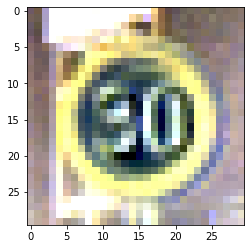

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)


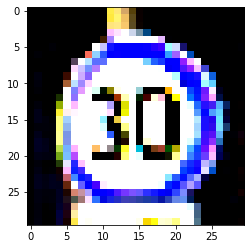

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)


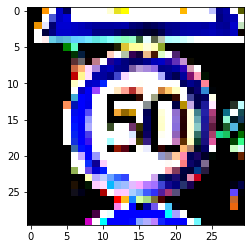

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)


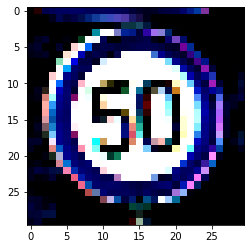

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


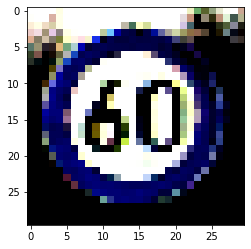

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


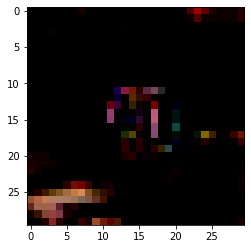

In [144]:
plt.imshow(X_train[4].view(30,30,3))
print(y_train[4])
plt.show()

plt.imshow(X_test[0].view(30,30,3))
print(y_test[0])
plt.show()

plt.imshow(X_train[2540].view(30,30,3))
print(y_train[2540])
plt.show()

plt.imshow(X_test[1000].view(30,30,3))
print(y_test[1000])
plt.show()

plt.imshow(X_train[-1].view(30,30,3))
print(y_train[-1])
plt.show()

plt.imshow(X_test[-6].view(30,30,3))
print(y_test[-6])
plt.show()

In [145]:
#create training and testing sets with dataloader
train_data = [(X_train[i], y_train[i]) for i in range(len(X_train))]
test_data = [(X_test[i], y_test[i]) for i in range(len(X_test))]
    
trainset = torch.utils.data.DataLoader(train_data, batch_size=30, shuffle=True)
testset = torch.utils.data.DataLoader(test_data, batch_size=30, shuffle=True)

In [146]:
total = 0
for each in trainset:
    total += 1
print(total)

196


**Simple Logistic Regression**

In [147]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
LR_train = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

print('Training Accuracy:', LR_train)
print('Testing Accuracy:', LR_test)

Training Accuracy: 0.9996598639455783
Testing Accuracy: 0.9255208333333333


**Neural Network**

In [159]:
class Net(nn.Module):
    
    # define layers
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2700, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 30)
        self.fc4 = nn.Linear(30, 3)
        
    # pass through each later
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

In [160]:
# initialize net and parameters
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()
EPOCHS = 1000

# loss and accuracy 
train_loss = []
train_acc = []
test_acc = []

print(net)

Net(
  (fc1): Linear(in_features=2700, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=3, bias=True)
)


In [161]:
for epoch in range(EPOCHS):
    
    for data in trainset:
        X,y = data
        
        # set gradient to 0 each time
        net.zero_grad()
        output = net(X.view(-1, 2700))
        loss = criterion(output, y)
        
        # backpropagation
        loss.backward()
        # take a step
        optimizer.step()
    
    if epoch%50 == 0: print(loss)
    
    # add to our loss array
    train_loss.append(loss)
    
    # compute running accuracies
    pred = torch.argmax(net.forward(X_train), axis=1)
    train = torch.sum(pred==y_train).float()/len(pred)
    train_acc.append(train.item())
    
    pred = torch.argmax(net.forward(X_test), axis=1)
    test = torch.sum(pred==y_test).float()/len(pred)
    test_acc.append(test.item())
    
# print final accuracies
print('Training Accuracy:', train_acc[-1])
print('Testing Accuracy:', test_acc[-1])

tensor(1.0969, grad_fn=<NllLossBackward>)
tensor(0.8339, grad_fn=<NllLossBackward>)
tensor(0.2468, grad_fn=<NllLossBackward>)
tensor(0.1104, grad_fn=<NllLossBackward>)
tensor(0.1025, grad_fn=<NllLossBackward>)
tensor(0.0260, grad_fn=<NllLossBackward>)
tensor(0.0177, grad_fn=<NllLossBackward>)
tensor(0.0076, grad_fn=<NllLossBackward>)
tensor(0.0079, grad_fn=<NllLossBackward>)
tensor(0.0033, grad_fn=<NllLossBackward>)
tensor(0.0069, grad_fn=<NllLossBackward>)
tensor(0.0174, grad_fn=<NllLossBackward>)
tensor(0.0016, grad_fn=<NllLossBackward>)
tensor(0.0007, grad_fn=<NllLossBackward>)
tensor(0.0013, grad_fn=<NllLossBackward>)
tensor(0.0043, grad_fn=<NllLossBackward>)
tensor(0.0011, grad_fn=<NllLossBackward>)
tensor(0.0010, grad_fn=<NllLossBackward>)
tensor(0.0009, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)
Training Accuracy: 1.0
Testing Accuracy: 0.885937511920929


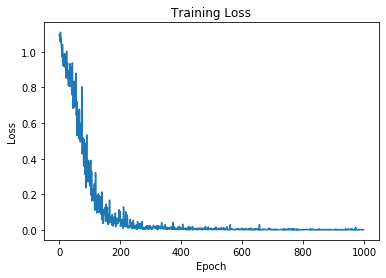

In [166]:
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

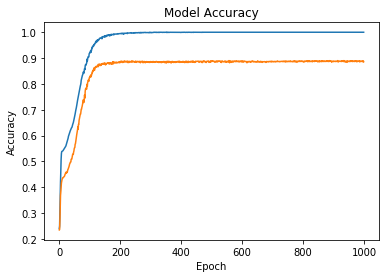

In [167]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()